<a href="https://colab.research.google.com/github/adityayadav4507/100Days_of_ML/blob/main/43_Day_IQR_method_for_outlier_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns

import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv('/content/placement_ith_marks.csv')

In [3]:
df.head()

,cgpa,placement_exam_marks,placed
0,7.19,26.0,1
1,7.46,38.0,1
2,7.54,40.0,1
3,6.42,8.0,1
4,7.23,17.0,0


In [5]:
df.shape

(1000, 3)

/tmp/ipython-input-6-2225070072.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['cgpa'])
/tmp/ipython-input-6-2225070072.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['placement_exam_marks'])


<Axes: xlabel='placement_exam_marks', ylabel='Density'>

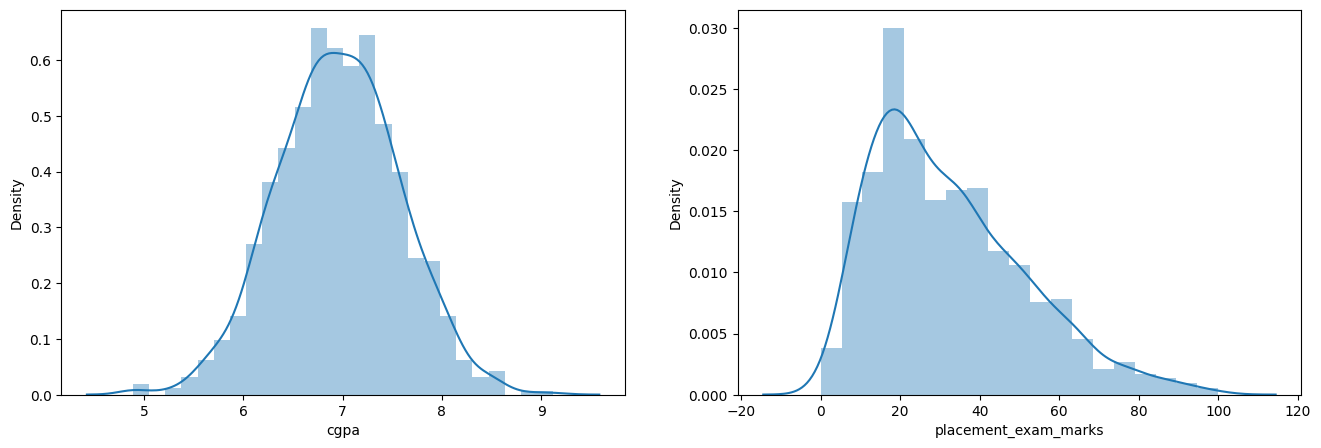

In [6]:
plt.figure(figsize=(16,5))
plt.subplot(1,2,1)
sns.distplot(df['cgpa'])
plt.subplot(1,2,2)
sns.distplot(df['placement_exam_marks'])

In [8]:
df['cgpa'].skew() # nearly normal distribution

np.float64(-0.014529938929314918)

In [9]:
df['placement_exam_marks'].skew()

np.float64(0.8356419499466834)

In [10]:
df['placement_exam_marks'].describe()

,placement_exam_marks
count,1000.000000
mean,32.225000
std,19.130822
min,0.000000
25%,17.000000
50%,28.000000
75%,44.000000
max,100.000000


<Axes: ylabel='placement_exam_marks'>

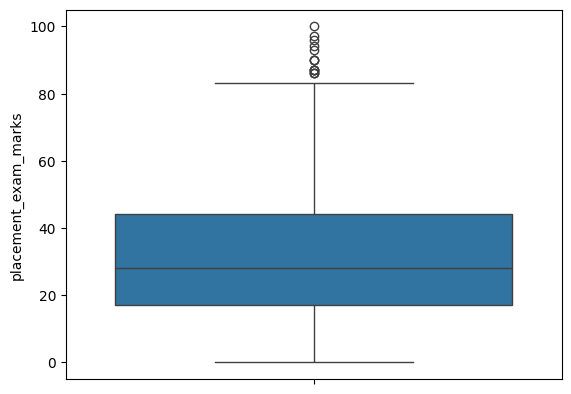

In [14]:
sns.boxplot(df['placement_exam_marks'])

In [15]:
# calculate IQR
percentile75 = df['placement_exam_marks'].quantile(0.75)
percentile25 = df['placement_exam_marks'].quantile(0.25)

In [16]:
percentile75

np.float64(44.0)

In [17]:
IQR=percentile75-percentile25

In [18]:
IQR

np.float64(27.0)

In [19]:
upper_limit=percentile75+1.5*IQR
lower_limit=percentile25-1.5*IQR

In [21]:
print("upper_limit=",upper_limit)
print("lower_limit=",lower_limit)

upper_limit= 84.5
lower_limit= -23.5


# Find outlier

In [22]:
df[(df['placement_exam_marks']>upper_limit) | (df['placement_exam_marks']<lower_limit)]

,cgpa,placement_exam_marks,placed
9,7.75,94.0,1
40,6.60,86.0,1
61,7.51,86.0,0
134,6.33,93.0,0
162,7.80,90.0,0
283,7.09,87.0,0
290,8.38,87.0,0
311,6.97,87.0,1
324,6.64,90.0,0
630,6.56,96.0,1


#Trimming

In [23]:
new_df=df[(df['placement_exam_marks']<upper_limit) & (df['placement_exam_marks']>lower_limit)]

In [24]:
new_df # 15 rows removed

,cgpa,placement_exam_marks,placed
0,7.19,26.0,1
1,7.46,38.0,1
2,7.54,40.0,1
3,6.42,8.0,1
4,7.23,17.0,0
...,...,...,...
995,8.87,44.0,1
996,9.12,65.0,1
997,4.89,34.0,0
998,8.62,46.0,1


/tmp/ipython-input-39-47618400.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['placement_exam_marks'])
/tmp/ipython-input-39-47618400.py:11: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(new_df['placement_exam_marks'])


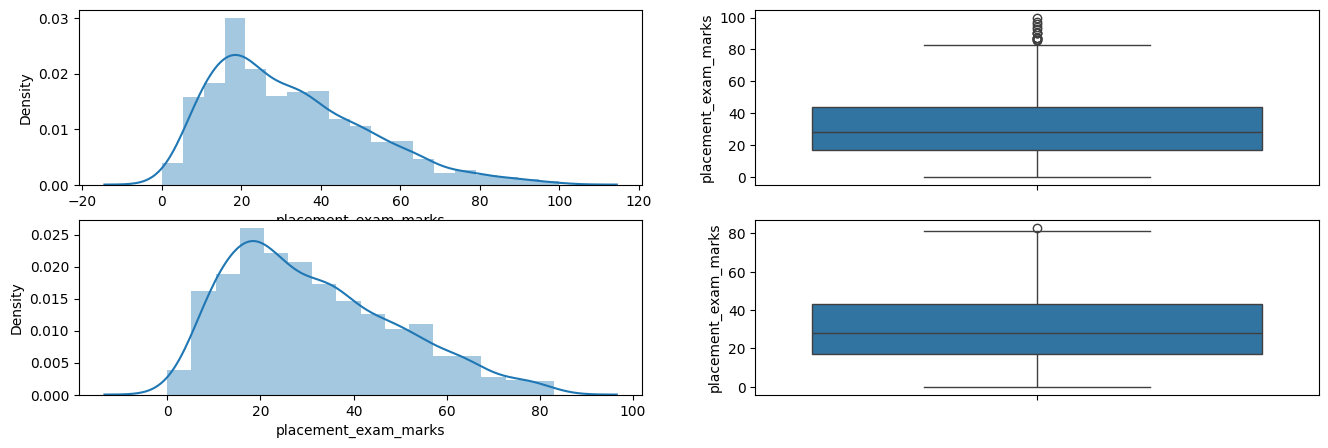

In [39]:
# comparing
plt.figure(figsize=(16,5))
plt.subplot(2,2,1)
sns.distplot(df['placement_exam_marks'])

plt.subplot(2,2,2)
sns.boxplot(df['placement_exam_marks'])


plt.subplot(2,2,3)
sns.distplot(new_df['placement_exam_marks'])

plt.subplot(2,2,4)
sns.boxplot(new_df['placement_exam_marks'])
plt.show()

## why this one outlier exist

In [28]:
new_df['placement_exam_marks'].describe()

,placement_exam_marks
count,985.000000
mean,31.339086
std,17.857633
min,0.000000
25%,17.000000
50%,28.000000
75%,43.000000
max,83.000000


In [33]:
new_percentile75 = new_df['placement_exam_marks'].quantile(0.75)
new_percentile25 = new_df['placement_exam_marks'].quantile(0.25)
new_IQR=new_percentile75-new_percentile25
new_upper_limit=new_percentile75+1.5*new_IQR
new_lower_limit=new_percentile25-1.5*new_IQR

print("new_percentile75=",new_percentile75)
print("new_percentile25=",new_percentile25)
print("old_percentile75=",percentile75)
print("old_percentile25=",percentile25)
print("IQR=",IQR)
print("new_IQR=",new_IQR)
print("upper_limit=",upper_limit)
print("lower_limit=",lower_limit)
print("new_upper_limit=",new_upper_limit)
print("new_lower_limit=",new_lower_limit)

new_percentile75= 43.0
new_percentile25= 17.0
old_percentile75= 44.0
old_percentile25= 17.0
IQR= 27.0
new_IQR= 26.0
upper_limit= 84.5
lower_limit= -23.5
new_upper_limit= 82.0
new_lower_limit= -22.0


In [34]:
# because of triming distribution changes due to which new outlier apper
new_df[new_df['placement_exam_marks']>new_upper_limit]
# this is new outlier according to new data this not happened in capping

,cgpa,placement_exam_marks,placed
403,6.71,83.0,0


# Capping

In [45]:
new_df_cap=df.copy()
new_df_cap['placement_exam_marks']=np.where(df['placement_exam_marks']>upper_limit,
                    upper_limit,
                    np.where(df['placement_exam_marks']<lower_limit,
                     lower_limit,
                     df['placement_exam_marks']))

In [46]:
new_df_cap

,cgpa,placement_exam_marks,placed
0,7.19,26.0,1
1,7.46,38.0,1
2,7.54,40.0,1
3,6.42,8.0,1
4,7.23,17.0,0
...,...,...,...
995,8.87,44.0,1
996,9.12,65.0,1
997,4.89,34.0,0
998,8.62,46.0,1


/tmp/ipython-input-69-79237856.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['placement_exam_marks'])
/tmp/ipython-input-69-79237856.py:11: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(new_df_cap['placement_exam_marks'])


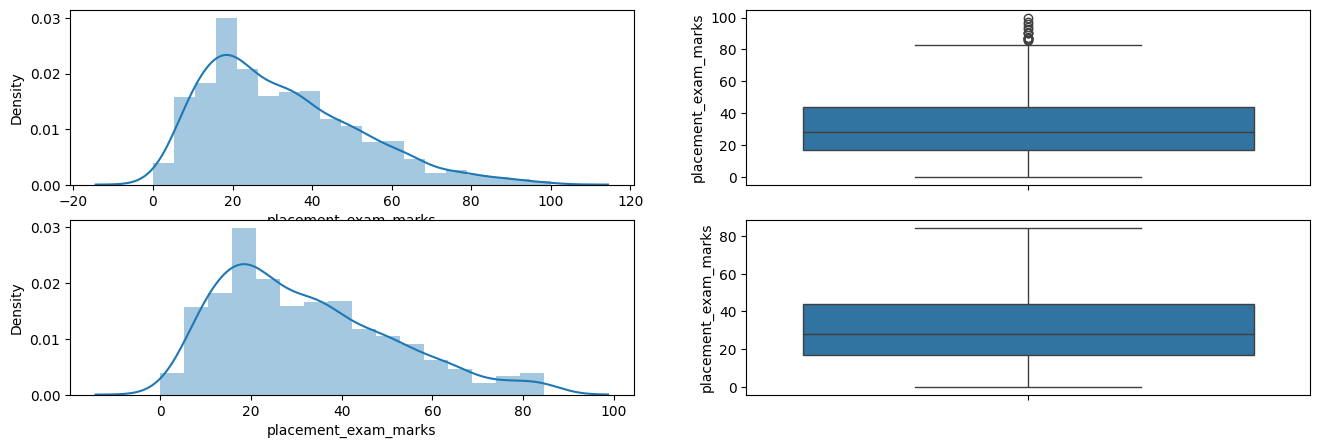

In [69]:
# comparing
plt.figure(figsize=(16,5))
plt.subplot(2,2,1)
sns.distplot(df['placement_exam_marks'])

plt.subplot(2,2,2)
sns.boxplot(df['placement_exam_marks'])


plt.subplot(2,2,3)
sns.distplot(new_df_cap['placement_exam_marks'])

plt.subplot(2,2,4)
sns.boxplot(new_df_cap['placement_exam_marks'])
plt.show()